In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import random
from matplotlib import animation
import math

# 1-D unbiased random walk

In [82]:
# 1 = +1
# 0 = -1 

def unbiased_rw(n, sims):
    dist = [0 for i in range(n)]
    distances = []
    for j in range(sims):
        dist_arr = [0]
        d = 0
        for i in range(n):
            x = random.randint(0,1)
            if x==0:
                d = d - 1
            else:
                d = d + 1
            dist_arr.append(d)
        #print("dist arr",dist_arr)
        dist = [x + y for x, y in zip(dist, dist_arr)]
        distances.append(dist_arr)
        #print("dist",dist)
    return np.array(dist)/sims, distances

def biased_rw(n, sims, p):
    dist = [0 for i in range(n)]
    distances = []
    for j in range(sims):
        dist_arr = [0]
        d = 0
        for i in range(n):
            x = np.random.choice([0,1], p=[p, 1-p])
            if x==0:
                d = d - 1
            else:
                d = d + 1
            dist_arr.append(d)
        #print("dist arr",dist_arr)
        dist = [x + y for x, y in zip(dist, dist_arr)]
        distances.append(dist_arr)
        #print("dist",dist)
    return np.array(dist)/sims, distances
        

In [83]:
n = 100
sims = 500
p = 0.3
x, distances_ub = unbiased_rw(n,sims)
arrs = []
distances_ub = np.array(distances_ub)
variance_ub = np.var(distances_ub, axis=0)
x_b, distances_b = biased_rw(n,sims,p)
variance_b = np.var(distances_b, axis=0)

all_dists_ub = []
all_dists_b = []
for i in range(sims):
    all_dists_ub.append(distances_ub[i][n-1])
    all_dists_b.append(distances_b[i][n-1])
all_dists_ub = np.array(all_dists_ub)
all_dists_b = np.array(all_dists_b)

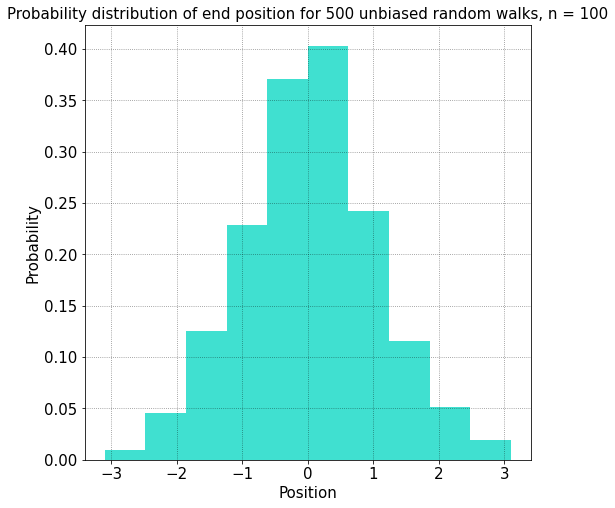

0.037599999999999995 0.9825062400000001


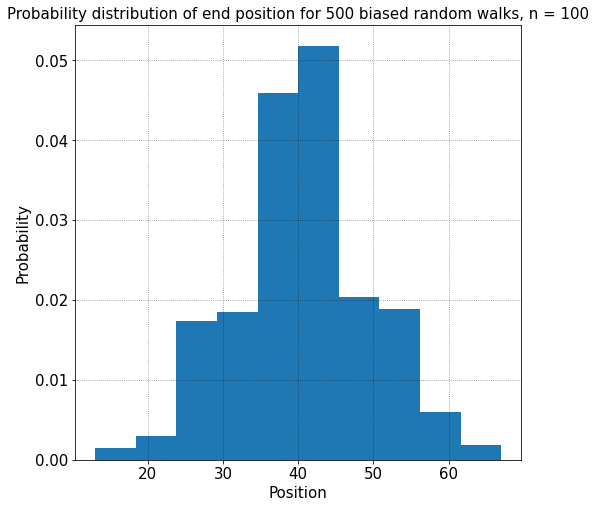

40.656 0.7664966400000001


In [84]:
fig, ax = plt.subplots(figsize=[8,8])
start = 0
end = sims
#for i in range(start,end):
plt.hist(all_dists_ub/math.sqrt(n), density=True, histtype='bar', color='turquoise')
plt.xlabel('Position', fontsize=15)
plt.ylabel('Probability', fontsize=15, color='k')
plt.title('Probability distribution of end position for {} unbiased random walks, n = {}'.format(end-start,n), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

print((all_dists_ub/math.sqrt(n)).mean(), (all_dists_ub/math.sqrt(n)).var())

fig, ax = plt.subplots(figsize=[8,8])
start = 0
end = sims
#for i in range(start,end):
plt.hist(all_dists_b, density=True, histtype='bar')
plt.xlabel('Position', fontsize=15)
plt.ylabel('Probability', fontsize=15, color='k')
plt.title('Probability distribution of end position for {} biased random walks, n = {}'.format(end-start,n), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

print((all_dists_b).mean(),(all_dists_b/math.sqrt(n)).var())


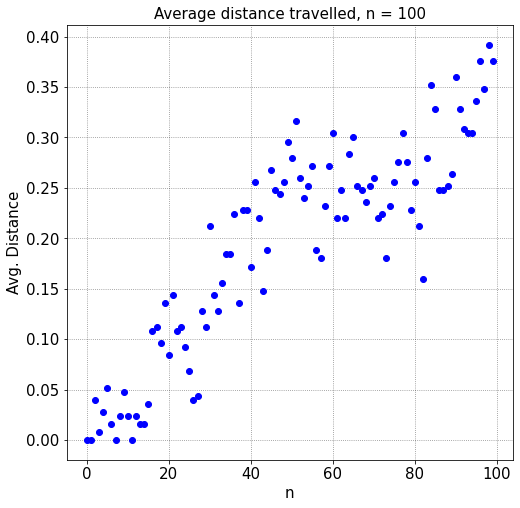

In [85]:
fig, ax = plt.subplots(figsize=[8,8])
plt.plot(abs(x),'bo')
plt.xlabel('n', fontsize=15)
plt.ylabel('Avg. Distance', fontsize=15, color='k')
plt.title('Average distance travelled, n = {}'.format(n), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

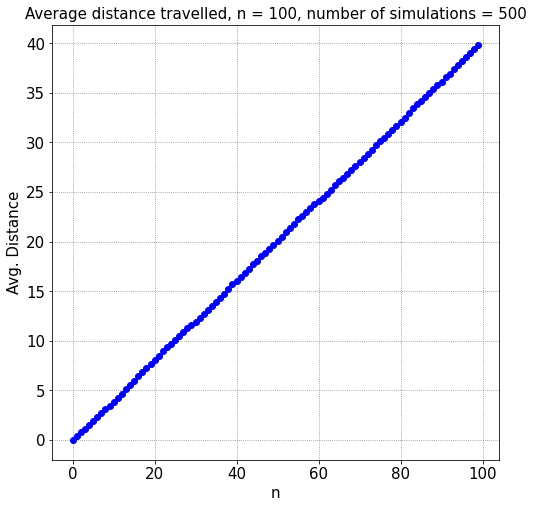

In [78]:
fig, ax = plt.subplots(figsize=[8,8])
plt.plot(x_b,'bo')
plt.xlabel('n', fontsize=15)
plt.ylabel('Avg. Distance', fontsize=15, color='k')
plt.title('Average distance travelled, n = {}, number of simulations = {}'.format(n, sims), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

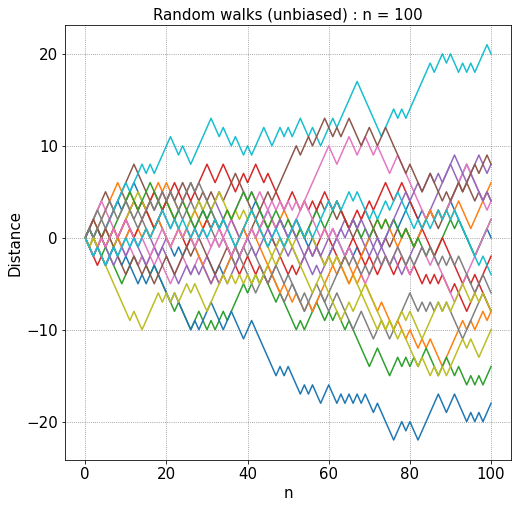

In [86]:
fig, ax = plt.subplots(figsize=[8,8])
for i in range(20):
    plt.plot(distances_ub[i],'-')
plt.xlabel('n', fontsize=15)
plt.ylabel('Distance', fontsize=15, color='k')
plt.title('Random walks (unbiased) : n = {}'.format(n), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

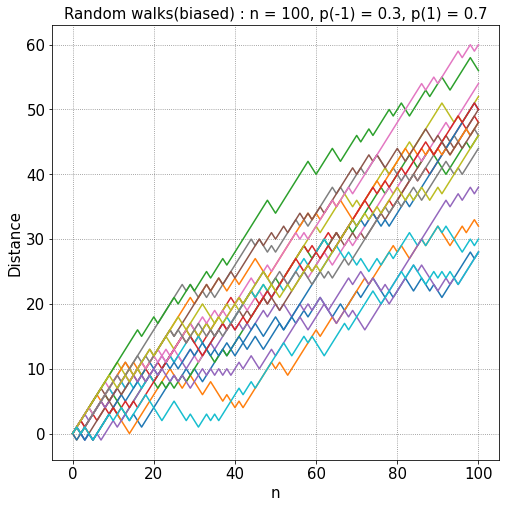

In [87]:
fig, ax = plt.subplots(figsize=[8,8])
for i in range(20):
    plt.plot(distances_b[i],'-')
plt.xlabel('n', fontsize=15)
plt.ylabel('Distance', fontsize=15, color='k')
plt.title('Random walks(biased) : n = {}, p(-1) = {}, p(1) = {}'.format(n, p, 1-p), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

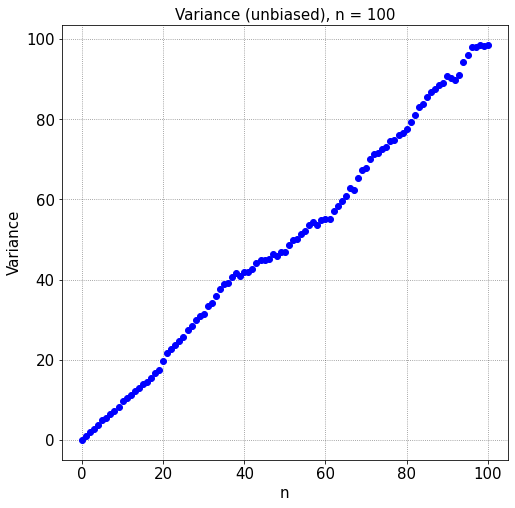

In [88]:
fig, ax = plt.subplots(figsize=[8,8])
plt.plot(variance_ub,'bo')
plt.xlabel('n', fontsize=15)
plt.ylabel('Variance', fontsize=15, color='k')
plt.title('Variance (unbiased), n = {}'.format(n), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

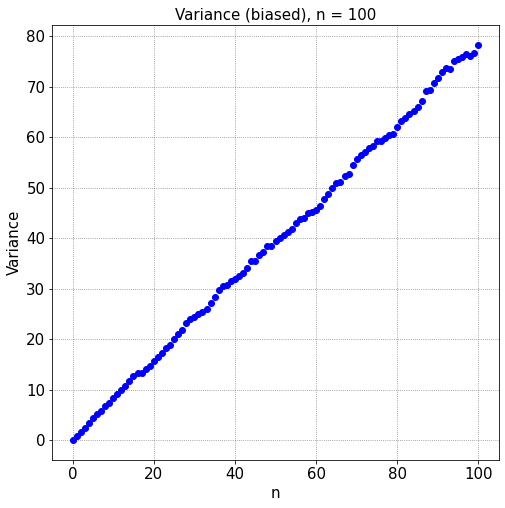

In [89]:
fig, ax = plt.subplots(figsize=[8,8])
plt.plot(variance_b,'bo')
plt.xlabel('n', fontsize=15)
plt.ylabel('Variance', fontsize=15, color='k')
plt.title('Variance (biased), n = {}'.format(n), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

# 2-D Random Walk

In [20]:
def random_walk(n):
#    random.seed(seed)
    x_dist = 0
    y_dist = 0
    x_arr = [x_dist]
    y_arr = [y_dist]

    for i in range(n):
        x = random.randint(0,1)
        y = random.randint(0,1)
        if x==0:
            x_dist = x_dist - 1
        elif x==1:
            x_dist = x_dist + 1
        x_arr.append(x_dist)
        if y==0:
            y_dist = y_dist - 1
        elif y==1:
            y_dist = y_dist + 1
        y_arr.append(y_dist)
    return [x_arr,y_arr]

In [48]:
seed = 1000
n = 10
sims = 500
[x,y] = random_walk(n)

In [49]:
avg = []
for i in range(n):
    avg.append(math.sqrt(x[i]**2 + y[i]**2))
avg = np.array(avg)

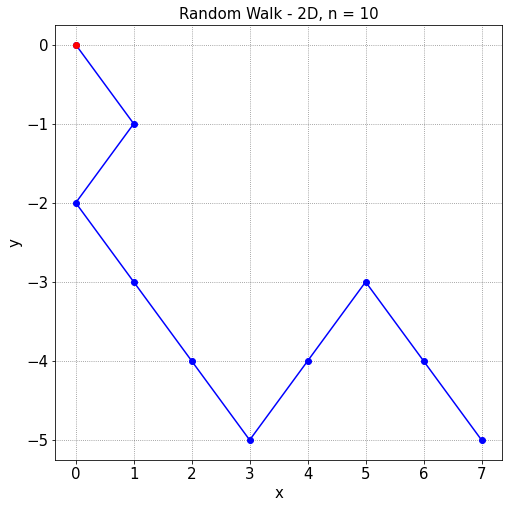

In [50]:
fig, ax = plt.subplots(figsize=[8,8])
plt.plot(x[0:10],y[0:10],'b-o')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15, color='k')
plt.title('Random Walk - 2D, n = {}'.format(n), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.plot(0,0, 'r-o', lw=5)
plt.show()


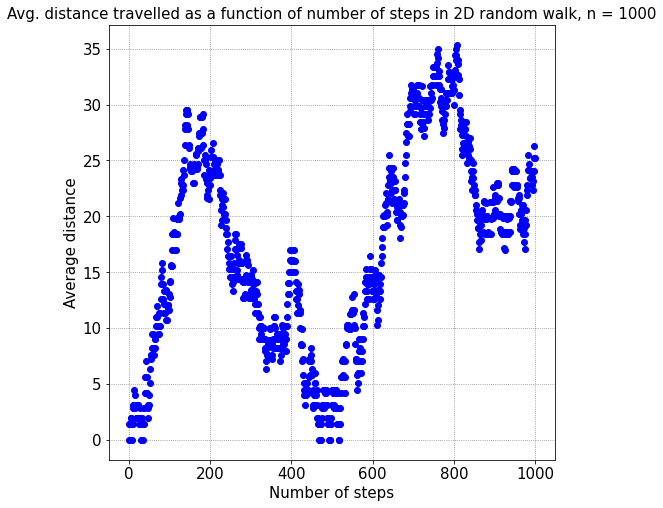

In [24]:
fig, ax = plt.subplots(figsize=[8,8])
plt.plot(avg,'bo')
plt.xlabel('Number of steps', fontsize=15)
plt.ylabel('Average distance', fontsize=15, color='k')
plt.title('Avg. distance travelled as a function of number of steps in 2D random walk, n = {}'.format(n), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

x ← 0 and y ← 0

lst ← a list containing the origin

do the following n times:

rand ← a random 0 or 1

if rand is 0

increment x by 1

else

decrement x by 1

rand ← a random 0 or 1

if rand is 0

increment y by 1

else

decrement y by 1

append point (x, y) onto end of lst

return lst

In [25]:
avgs = []


# Project Q8

In [26]:
def random_walk_mod(n, sims):
#    random.seed(seed)
    x_fin = []
    y_fin = []
    for i in range(sims):
        x_dist = 0
        y_dist = 0
        x_arr = [x_dist]
        y_arr = [y_dist]
        p = [0.19,0.24,0.17,0.1,0.02,0.03,0.1,0.15]
        for i in range(n):
            x = np.random.choice([1,2,3,4,5,6,7,8], p=p)
            if x==1:
                y_dist = y_dist + 1
            elif x==2:
                x_dist = x_dist + 1
                y_dist = y_dist + 1
            elif x==3:
                x_dist = x_dist + 1
            elif x==4:
                x_dist = x_dist + 1
                y_dist = y_dist - 1
            elif x==5:
                y_dist = y_dist - 1
            elif x==6:
                x_dist = x_dist - 1
                y_dist = y_dist - 1
            elif x==7:
                x_dist = x_dist - 1
            elif x==8:
                x_dist = x_dist - 1
                y_dist = y_dist + 1
            x_arr.append(x_dist)
            y_arr.append(y_dist)
        x_fin.append(x_arr)
        y_fin.append(y_arr)
    return [x_fin,y_fin]

In [27]:
n = 50
sims = 10
[x_mod,y_mod] = random_walk_mod(n, sims)


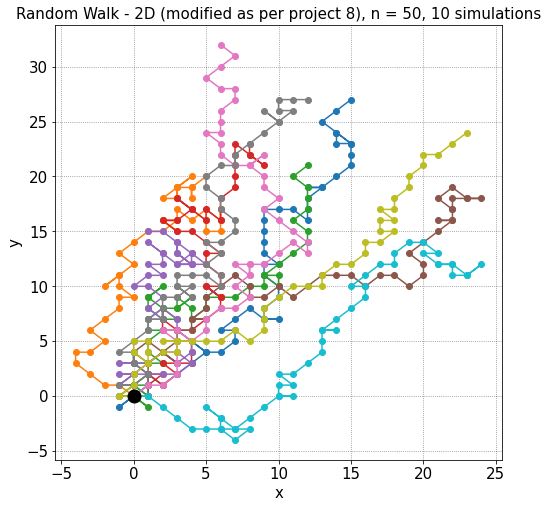

In [28]:
fig, ax = plt.subplots(figsize=[8,8])
for i in range(sims):
    plt.plot(x_mod[i],y_mod[i],'-o')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15, color='k')
plt.title('Random Walk - 2D (modified as per project 8), n = {}, {} simulations'.format(n, sims), fontsize=15, color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.plot(0,0, 'k-o', markersize=13)
plt.show()
